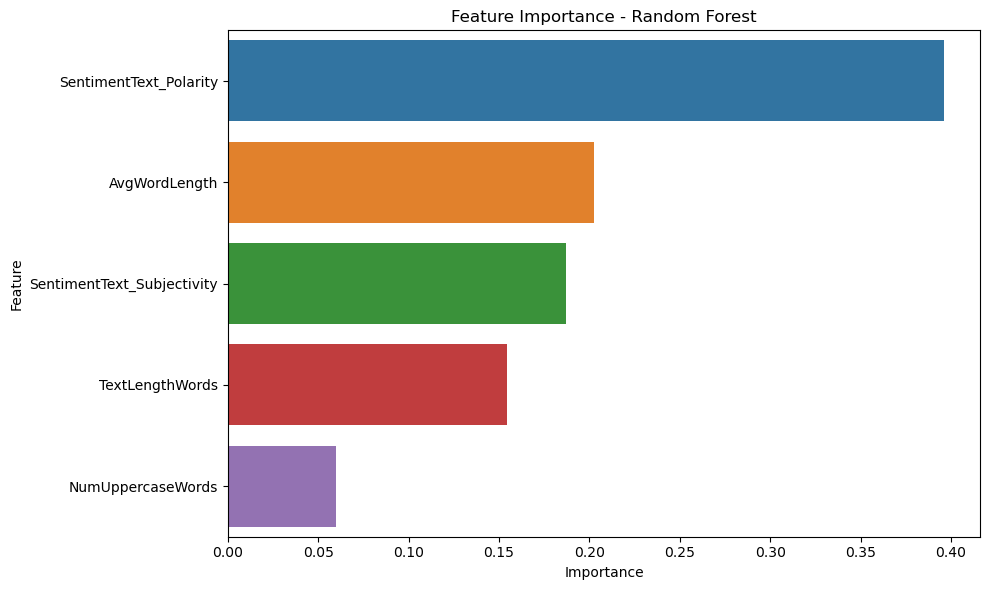

                      Feature  Importance
0      SentimentText_Polarity    0.396281
4               AvgWordLength    0.202610
1  SentimentText_Subjectivity    0.187145
2             TextLengthWords    0.154341
3           NumUppercaseWords    0.059623


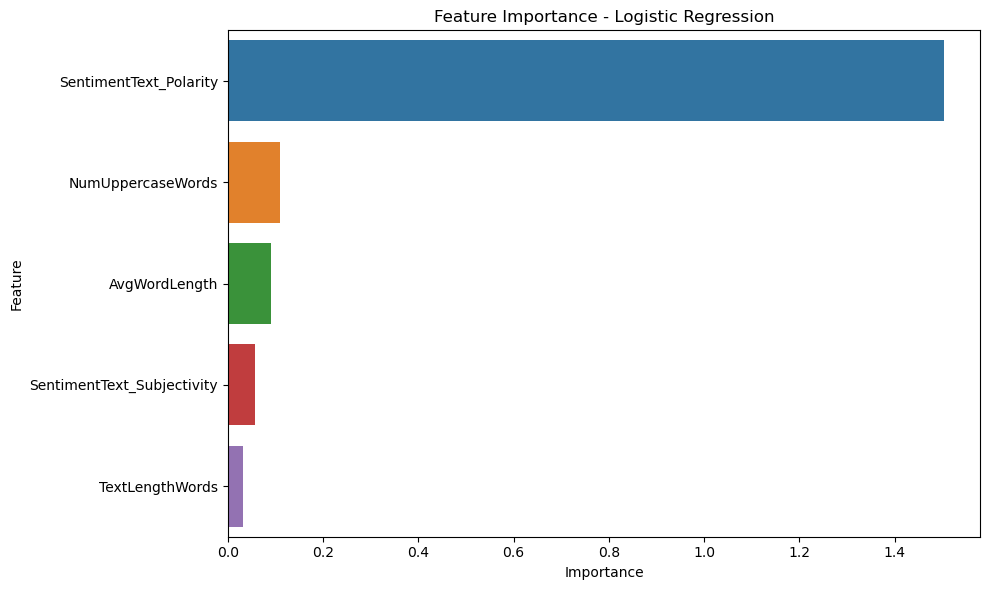

                      Feature  Importance
0      SentimentText_Polarity    1.504230
3           NumUppercaseWords    0.110417
4               AvgWordLength    0.090479
1  SentimentText_Subjectivity    0.056479
2             TextLengthWords    0.032646


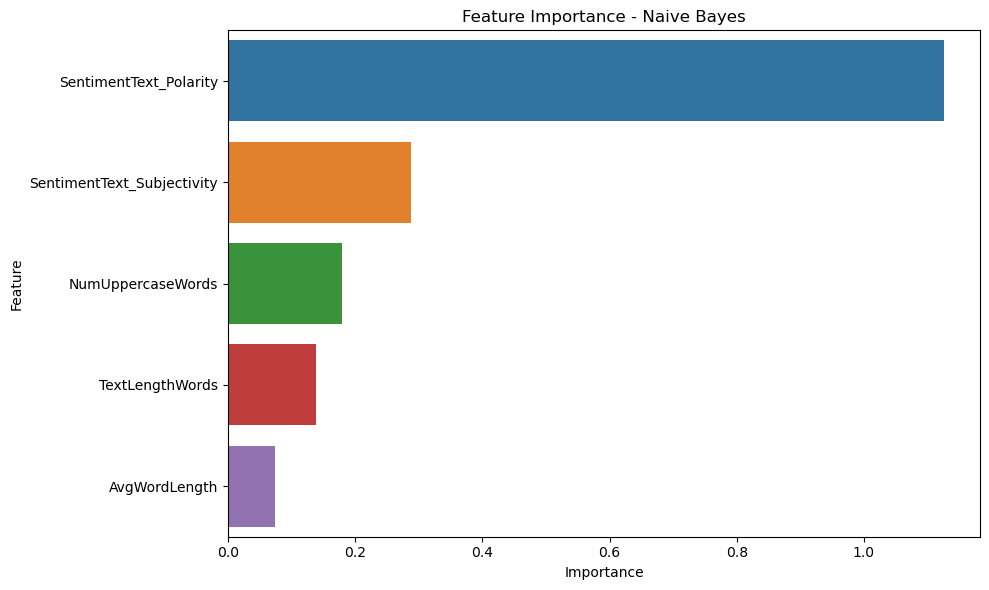

                      Feature  Importance
0      SentimentText_Polarity    1.126111
1  SentimentText_Subjectivity    0.288623
3           NumUppercaseWords    0.179161
2             TextLengthWords    0.138133
4               AvgWordLength    0.074262


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Stap 1: Laad data ===
df = pd.read_csv("text_features_full.csv")

# === Stap 2: Filter & Label ===
df = df[df['Score'] != 3]
df['Label'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

# === Stap 3: Selecteer textuele features ===
text_features = [
    'SentimentText_Polarity',
    'SentimentText_Subjectivity',
    'TextLengthWords',
    'NumUppercaseWords',
    'AvgWordLength'
]

X = df[text_features]
y = df['Label']

# === Stap 4: Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Functie om feature importances te plotten
def plot_feature_importance(importance, model_name):
    importance_df = pd.DataFrame({
        'Feature': text_features,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature')
    plt.title(f'Feature Importance - {model_name}')
    plt.tight_layout()
    plt.show()
    print(importance_df)

# === Random Forest ===
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42))
])
pipe_rf.fit(X_train, y_train)

rf_model = pipe_rf.named_steps['rf']
rf_importance = rf_model.feature_importances_
plot_feature_importance(rf_importance, 'Random Forest')

# === Logistic Regression ===
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42))
])
pipe_lr.fit(X_train, y_train)

lr_model = pipe_lr.named_steps['lr']
lr_importance = np.abs(lr_model.coef_[0])  # Neem absolute waarde van de coëfficiënten
plot_feature_importance(lr_importance, 'Logistic Regression')

# === Naive Bayes ===
pipe_nb = Pipeline([
    ('scaler', StandardScaler()),  # Niet standaard bij Naive Bayes, maar voor consistentie met anderen
    ('nb', GaussianNB())
])
pipe_nb.fit(X_train, y_train)

nb_model = pipe_nb.named_steps['nb']
# Feature importance benadering: verschil van gemiddelde log likelihoods
nb_importance = np.abs(nb_model.theta_[1] - nb_model.theta_[0])
plot_feature_importance(nb_importance, 'Naive Bayes')

